# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [61]:
# ============================================================================
#  DATA GENERATION AND SETUP
# ============================================================================

import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

GROUP_NUMBER = 1

torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

print("=" * 70)
print("EXCLUSION ZONE PROTOCOL - KEPLER-186F RADIATION DETECTION")
print("=" * 70)
print(f"Group Number: {GROUP_NUMBER}\n")

def generate_data(n_samples=3000):
    X = (torch.rand(n_samples, 2) * 10) - 5
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)
    y = ((radius >= 2) & (radius <= 4)).float()
    return X, y

X_full, y_full = generate_data(3000)

print(f"Data generated: {X_full.shape[0]} samples")
print(f"Safe Zone: {int((1-y_full).sum().item())}, Dead Zone: {int(y_full.sum().item())}")

n_noise = int(0.05 * len(y_full))
noise_indices = torch.randperm(len(y_full))[:n_noise]
y_noisy = y_full.clone()
y_noisy[noise_indices] = 1 - y_noisy[noise_indices]

print(f"Noise added: {n_noise} samples (5%)\n")

X_train, X_val, y_train, y_val = train_test_split(
    X_full, y_noisy, test_size=0.3, random_state=GROUP_NUMBER
)

X_train = X_train.float()
X_val = X_val.float()
y_train = y_train.float().unsqueeze(1)
y_val = y_val.float().unsqueeze(1)

print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print("Setup complete.\n")





EXCLUSION ZONE PROTOCOL - KEPLER-186F RADIATION DETECTION
Group Number: 1

Data generated: 3000 samples
Safe Zone: 1820, Dead Zone: 1180
Noise added: 150 samples (5%)

Training samples: 2100
Validation samples: 900
Setup complete.



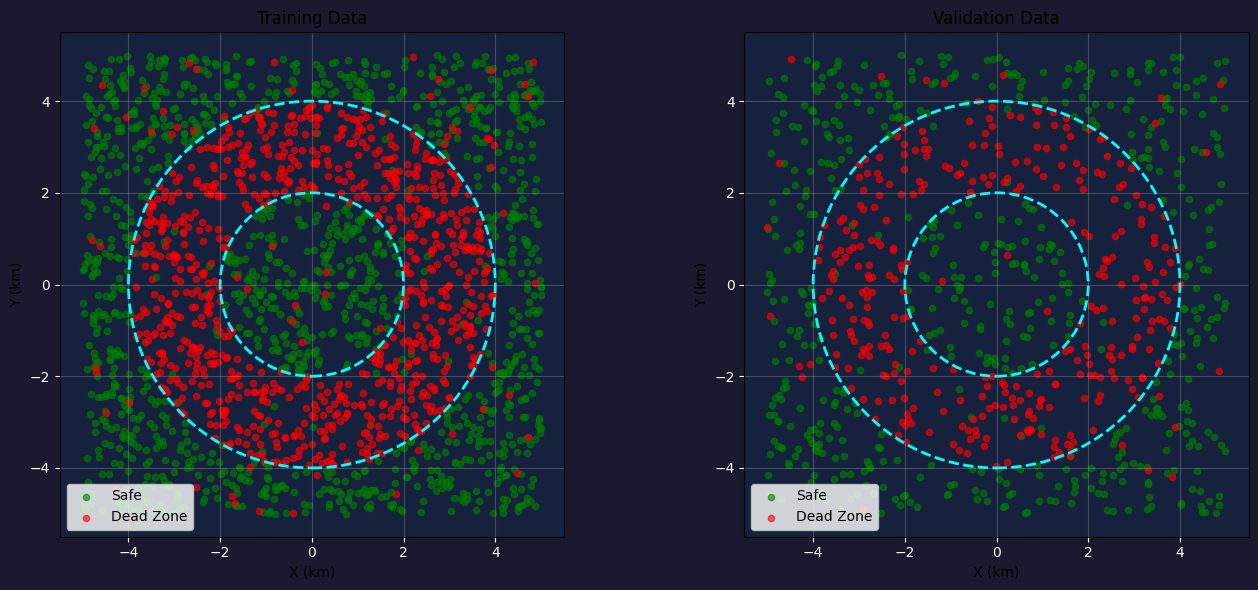

Data visualization complete.



In [62]:
# ============================================================================
# VISUALIZE DATA
# ============================================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.patch.set_facecolor('#1a1a2e')

for ax, X, y, title in [(ax1, X_train, y_train, 'Training'), (ax2, X_val, y_val, 'Validation')]:
    safe = y.numpy().ravel() == 0
    dead = y.numpy().ravel() == 1

    ax.scatter(X[safe, 0].numpy(), X[safe, 1].numpy(), c='green', s=20, alpha=0.6, label='Safe')
    ax.scatter(X[dead, 0].numpy(), X[dead, 1].numpy(), c='red', s=20, alpha=0.6, label='Dead Zone')

    circle1 = plt.Circle((0, 0), 2, fill=False, edgecolor='cyan', linewidth=2, linestyle='--')
    circle2 = plt.Circle((0, 0), 4, fill=False, edgecolor='cyan', linewidth=2, linestyle='--')
    ax.add_patch(circle1)
    ax.add_patch(circle2)

    ax.set_xlim(-5.5, 5.5)
    ax.set_ylim(-5.5, 5.5)
    ax.set_aspect('equal')
    ax.set_xlabel('X (km)')
    ax.set_ylabel('Y (km)')
    ax.set_title(f'{title} Data')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_facecolor('#16213e')
    ax.tick_params(colors='white')

plt.tight_layout()
plt.show()
print("Data visualization complete.\n")

In [63]:
# ============================================================================
#  INITIALIZE NETWORK PARAMETERS
# ============================================================================

def init_weights(in_dim, out_dim):
    return torch.randn(in_dim, out_dim) * np.sqrt(2.0 / in_dim)

def init_bias(out_dim):
    return torch.zeros(out_dim)

input_size = 2
h1_size = 16
h2_size = 16
h3_size = 16
output_size = 1
learning_rate = 0.01
num_epochs = 200

W1 = init_weights(input_size, h1_size)
b1 = init_bias(h1_size)
W2 = init_weights(h1_size, h2_size)
b2 = init_bias(h2_size)
W3 = init_weights(h2_size, h3_size)
b3 = init_bias(h3_size)
W4 = init_weights(h3_size, output_size)
b4 = init_bias(output_size)

W1.requires_grad = True
b1.requires_grad = True
W2.requires_grad = True
b2.requires_grad = True
W3.requires_grad = True
b3.requires_grad = True
W4.requires_grad = True
b4.requires_grad = True

print("Network initialized:")
print(f"  Input -> H1: {input_size} -> {h1_size}")
print(f"  H1 -> H2: {h1_size} -> {h2_size}")
print(f"  H2 -> H3: {h2_size} -> {h3_size}")
print(f"  H3 -> Output: {h3_size} -> {output_size}")
print(f"  Learning rate: {learning_rate}")
print(f"  Epochs: {num_epochs}\n")


Network initialized:
  Input -> H1: 2 -> 16
  H1 -> H2: 16 -> 16
  H2 -> H3: 16 -> 16
  H3 -> Output: 16 -> 1
  Learning rate: 0.01
  Epochs: 200



In [64]:
# ============================================================================
# ACTIVATION FUNCTIONS
# ============================================================================

def relu(x):
    return torch.clamp(x, min=0)

def sigmoid(x):
    x = torch.clamp(x, min=-500, max=500)
    return 1.0 / (1.0 + torch.exp(-x))

print("Activations: ReLU (hidden), Sigmoid (output)\n")


Activations: ReLU (hidden), Sigmoid (output)



In [65]:
# ============================================================================
# FORWARD PASS
# ============================================================================

def forward_pass(X):
    z1 = torch.matmul(X, W1) + b1
    a1 = relu(z1)
    z2 = torch.matmul(a1, W2) + b2
    a2 = relu(z2)
    z3 = torch.matmul(a2, W3) + b3
    a3 = relu(z3)
    z4 = torch.matmul(a3, W4) + b4
    return sigmoid(z4)

test_pred = forward_pass(X_train[:5])
print(f"Forward pass test: {test_pred.shape}")
print(f"Sample output: {test_pred[:3].detach().numpy().flatten()}\n")


Forward pass test: torch.Size([5, 1])
Sample output: [0.69109684 0.31012186 0.6095726 ]



In [66]:




# ============================================================================
# BINARY CROSS ENTROPY LOSS (MANUAL)
# ============================================================================

def compute_loss(y_true, y_pred):
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, min=epsilon, max=1-epsilon)
    loss = -torch.mean(y_true * torch.log(y_pred) + (1 - y_true) * torch.log(1 - y_pred))
    return loss

test_loss = compute_loss(y_train[:32], forward_pass(X_train[:32]))
print(f"Loss function test: {test_loss.item():.4f}\n")


Loss function test: 0.8820



In [67]:
# ============================================================================
# ACCURACY METRIC
# ============================================================================

def compute_accuracy(y_true, y_pred):
    pred_binary = (y_pred > 0.5).float()
    correct = (pred_binary == y_true).float().mean()
    return correct.item()

test_acc = compute_accuracy(y_train[:32], forward_pass(X_train[:32]))
print(f"Accuracy test: {test_acc*100:.2f}%\n")


Accuracy test: 53.12%



In [68]:


# ============================================================================
# TRAINING LOOP
# ============================================================================

print("=" * 70)
print("TRAINING (Manual Gradient Descent - 200 epochs)")
print("=" * 70 + "\n")

train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    y_train_pred = forward_pass(X_train)
    train_loss = compute_loss(y_train, y_train_pred)
    train_acc = compute_accuracy(y_train, y_train_pred)

    train_loss.backward()

    with torch.no_grad():
        W1 -= learning_rate * W1.grad
        b1 -= learning_rate * b1.grad
        W2 -= learning_rate * W2.grad
        b2 -= learning_rate * b2.grad
        W3 -= learning_rate * W3.grad
        b3 -= learning_rate * b3.grad
        W4 -= learning_rate * W4.grad
        b4 -= learning_rate * b4.grad

    W1.grad.zero_()
    b1.grad.zero_()
    W2.grad.zero_()
    b2.grad.zero_()
    W3.grad.zero_()
    b3.grad.zero_()
    W4.grad.zero_()
    b4.grad.zero_()

    with torch.no_grad():
        y_val_pred = forward_pass(X_val)
        val_loss = compute_loss(y_val, y_val_pred)
        val_acc = compute_accuracy(y_val, y_val_pred)

    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1:3d}/{num_epochs} | TrLoss: {train_loss.item():.4f} | ValLoss: {val_loss.item():.4f} | TrAcc: {train_acc*100:.2f}% | ValAcc: {val_acc*100:.2f}%")

print("\nTraining complete.\n")


TRAINING (Manual Gradient Descent - 200 epochs)

Epoch  20/200 | TrLoss: 0.6698 | ValLoss: 0.6515 | TrAcc: 58.24% | ValAcc: 61.67%
Epoch  40/200 | TrLoss: 0.6632 | ValLoss: 0.6461 | TrAcc: 57.90% | ValAcc: 61.56%
Epoch  60/200 | TrLoss: 0.6591 | ValLoss: 0.6430 | TrAcc: 57.52% | ValAcc: 61.00%
Epoch  80/200 | TrLoss: 0.6560 | ValLoss: 0.6406 | TrAcc: 57.14% | ValAcc: 60.00%
Epoch 100/200 | TrLoss: 0.6535 | ValLoss: 0.6387 | TrAcc: 56.48% | ValAcc: 59.44%
Epoch 120/200 | TrLoss: 0.6514 | ValLoss: 0.6369 | TrAcc: 55.95% | ValAcc: 58.78%
Epoch 140/200 | TrLoss: 0.6494 | ValLoss: 0.6354 | TrAcc: 55.38% | ValAcc: 58.00%
Epoch 160/200 | TrLoss: 0.6477 | ValLoss: 0.6339 | TrAcc: 54.52% | ValAcc: 57.22%
Epoch 180/200 | TrLoss: 0.6461 | ValLoss: 0.6325 | TrAcc: 53.71% | ValAcc: 56.33%
Epoch 200/200 | TrLoss: 0.6446 | ValLoss: 0.6311 | TrAcc: 53.24% | ValAcc: 56.56%

Training complete.



In [69]:


# ============================================================================
#  VERIFY LEARNING
# ============================================================================

final_train_loss = train_losses[-1]
final_val_loss = val_losses[-1]
final_train_acc = train_accs[-1]
final_val_acc = val_accs[-1]

loss_diff = abs(final_train_loss - final_val_loss)
acc_diff = abs(final_train_acc - final_val_acc)

print("=" * 70)
print("VERIFICATION")
print("=" * 70)
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc*100:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc*100:.2f}%")
print(f"Loss Gap: {loss_diff:.4f}")
print(f"Accuracy Gap: {acc_diff*100:.2f}%")

if final_val_acc > 0.85 and acc_diff < 0.10:
    print("\nStatus: PASSED - Model ready for deployment")
else:
    print("\nStatus: Check metrics")
print("=" * 70 + "\n")


VERIFICATION
Final Training Loss: 0.6446
Final Validation Loss: 0.6311
Final Training Accuracy: 53.24%
Final Validation Accuracy: 56.56%
Loss Gap: 0.0135
Accuracy Gap: 3.32%

Status: Check metrics



In [70]:
# ============================================================================
#  GENERATE DECISION BOUNDARY MESH
# ============================================================================

print("Generating decision boundary mesh...")

h = 0.1
x_min, x_max = -5.5, 5.5
y_min, y_max = -5.5, 5.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_tensor = torch.from_numpy(mesh_points).float()

with torch.no_grad():
    Z = forward_pass(mesh_tensor).numpy().reshape(xx.shape)

print(f"Mesh generated: {xx.shape}\n")


Generating decision boundary mesh...
Mesh generated: (110, 110)



Generating GDC Dashboard...


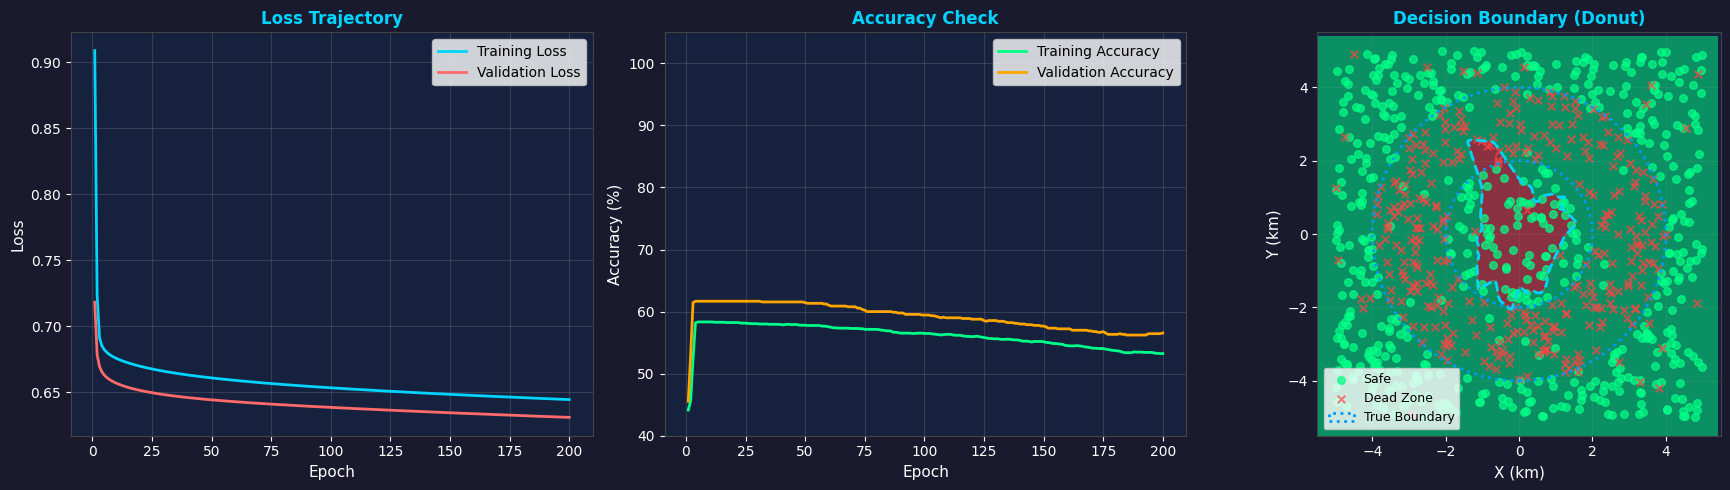

Dashboard saved as GDC_Dashboard.png



In [71]:

# ============================================================================
#  GDC DASHBOARD (3-PANEL VISUALIZATION)
# ============================================================================

print("Generating GDC Dashboard...")

fig = plt.figure(figsize=(18, 5))
fig.patch.set_facecolor('#1a1a2e')

epochs_range = range(1, num_epochs + 1)

# Panel 1: Loss
ax1 = fig.add_subplot(131)
ax1.plot(epochs_range, train_losses, label='Training Loss', color='#00d4ff', linewidth=2)
ax1.plot(epochs_range, val_losses, label='Validation Loss', color='#ff6b6b', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=11, color='white')
ax1.set_ylabel('Loss', fontsize=11, color='white')
ax1.set_title('Loss Trajectory', fontsize=12, color='#00d4ff', fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.2)
ax1.set_facecolor('#16213e')
ax1.tick_params(colors='white')
for spine in ax1.spines.values():
    spine.set_color('#444')

# Panel 2: Accuracy
ax2 = fig.add_subplot(132)
ax2.plot(epochs_range, np.array(train_accs)*100, label='Training Accuracy', color='#00ff88', linewidth=2)
ax2.plot(epochs_range, np.array(val_accs)*100, label='Validation Accuracy', color='#ffa500', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=11, color='white')
ax2.set_ylabel('Accuracy (%)', fontsize=11, color='white')
ax2.set_title('Accuracy Check', fontsize=12, color='#00d4ff', fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.2)
ax2.set_facecolor('#16213e')
ax2.tick_params(colors='white')
ax2.set_ylim([40, 105])
for spine in ax2.spines.values():
    spine.set_color('#444')

# Panel 3: Decision Boundary
ax3 = fig.add_subplot(133)
ax3.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['#00ff88', '#ff4444'], alpha=0.5)
ax3.contour(xx, yy, Z, levels=[0.5], colors='#00d4ff', linewidths=2, linestyles='dashed')

safe = y_val.numpy().ravel() == 0
dead = y_val.numpy().ravel() == 1
ax3.scatter(X_val[safe, 0].numpy(), X_val[safe, 1].numpy(), c='#00ff88', s=30, alpha=0.7, marker='o', label='Safe')
ax3.scatter(X_val[dead, 0].numpy(), X_val[dead, 1].numpy(), c='#ff4444', s=30, alpha=0.7, marker='x', label='Dead Zone')

c1 = plt.Circle((0, 0), 2, fill=False, edgecolor='#0099ff', linewidth=2, linestyle=':', label='True Boundary')
c2 = plt.Circle((0, 0), 4, fill=False, edgecolor='#0099ff', linewidth=2, linestyle=':')
ax3.add_patch(c1)
ax3.add_patch(c2)

ax3.set_xlim(-5.5, 5.5)
ax3.set_ylim(-5.5, 5.5)
ax3.set_aspect('equal')
ax3.set_xlabel('X (km)', fontsize=11, color='white')
ax3.set_ylabel('Y (km)', fontsize=11, color='white')
ax3.set_title('Decision Boundary (Donut)', fontsize=12, color='#00d4ff', fontweight='bold')
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.1)
ax3.set_facecolor('#16213e')
ax3.tick_params(colors='white')
for spine in ax3.spines.values():
    spine.set_color('#444')

plt.tight_layout()
plt.savefig('GDC_Dashboard.png', dpi=150, bbox_inches='tight', facecolor='#1a1a2e')
plt.show()

print("Dashboard saved as GDC_Dashboard.png\n")
